In [ ]:
# ============================================================
# 1. Imports y configuración
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)


In [ ]:
# ============================================================
# 2. Carga de datos procesados (.npy)
# ============================================================

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

print("Dimensiones de los datos:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

# Ver distribución de clases en train y test
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("\nDistribución de clases en y_train:")
for u, c in zip(unique_train, counts_train):
    print(f"Clase {u}: {c} ({c / len(y_train):.3f})")

print("\nDistribución de clases en y_test:")
for u, c in zip(unique_test, counts_test):
    print(f"Clase {u}: {c} ({c / len(y_test):.3f})")


Dimensiones de los datos:
X_train: (39073, 108)
X_test : (9769, 108)
y_train: (39073,)
y_test : (9769,)

Distribución de clases en y_train:
Clase 0: 29724 (0.761)
Clase 1: 9349 (0.239)

Distribución de clases en y_test:
Clase 0: 7431 (0.761)
Clase 1: 2338 (0.239)


In [ ]:
# ============================================================
# 3. Definición y entrenamiento del modelo Perceptrón
# ============================================================

# Nota:
# - max_iter y tol se ajustan para asegurar convergencia.
# - class_weight="balanced" compensa el desbalance de clases.
perceptron = Perceptron(
    max_iter=1000,
    tol=1e-3,
    class_weight="balanced",
    random_state=42
)

perceptron.fit(X_train, y_train)

print("\nModelo Perceptrón entrenado.")


Modelo Perceptrón entrenado.


In [ ]:
# ============================================================
# 4. Evaluación en conjunto de prueba
# ============================================================

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\nMétricas en conjunto de prueba:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nReporte de clasificación completo:")
print(classification_report(y_test, y_pred, digits=4))



Métricas en conjunto de prueba:
Accuracy : 0.8214
Precisión: 0.7132
Sensibilidad (Recall): 0.4243
F1-score: 0.5320

Reporte de clasificación completo:
              precision    recall  f1-score   support

           0     0.8393    0.9463    0.8896      7431
           1     0.7132    0.4243    0.5320      2338

    accuracy                         0.8214      9769
   macro avg     0.7762    0.6853    0.7108      9769
weighted avg     0.8091    0.8214    0.8040      9769



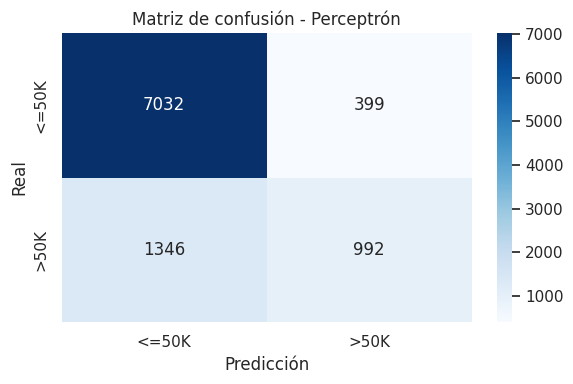


Matriz de confusión (forma numérica):
[[7032  399]
 [1346  992]]


In [ ]:
# ============================================================
# 5. Matriz de confusión
# ============================================================

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["<=50K", ">50K"],
    yticklabels=["<=50K", ">50K"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Perceptrón")
plt.tight_layout()
plt.show()

print("\nMatriz de confusión (forma numérica):")
print(cm)
